# Cleaning

We load the csv file and view the first rows

In [1]:
import pandas as pd

# Cargar el CSV en un DataFrame
df_2018 = pd.read_csv('../data/raw/2018.csv')  

# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas para exploración inicial
df_2018.head(5)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


We remove the columns that we do not need for our future analysis.

In [2]:
# Eliminar columnas innecesarias (suponiendo que algunas no son útiles para el análisis)
columns_to_drop = ['Social support']

df_2018 = df_2018.drop(columns=columns_to_drop)

# Verificar las primeras filas después de eliminar las columnas
print("Después de eliminar columnas innecesarias:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df_2018.head(5)

Después de eliminar columnas innecesarias:


,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,0.927,0.660,0.256,0.357


Here we have to normalize some columns so that later when doing the merge it is much easier.

In [3]:
# Normalización de nombres de columnas
df_2018.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Happiness_Score',
    'GDP per capita': 'GDP_per_Capita',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Perceptions_of_corruption'
}, inplace=True)

# Mostrar las primeras filas después de renombrar las columnas
print("\nPrimeras filas después de renombrar columnas:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas para exploración inicial
df_2018.head(5)


Primeras filas después de renombrar columnas:


,Happiness_Rank,Country,Happiness_Score,GDP_per_Capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,1,Finland,7.632,1.305,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,0.927,0.660,0.256,0.357


We check that there are no nulls

In [4]:
# Revisar la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df_2018.isnull().sum())


Valores nulos por columna:
Happiness_Rank               0
Country                      0
Happiness_Score              0
GDP_per_Capita               0
Healthy_life_expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_corruption    1
dtype: int64


The null is in the corruption perception column

In [6]:
df_2018[df_2018['Perceptions_of_corruption'].isnull()]

,Happiness_Rank,Country,Happiness_Score,GDP_per_Capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
19,20,United Arab Emirates,6.774,2.096,0.67,0.284,0.186,NaN


We impute the ass with the value of the mean since it is just null data

In [ ]:
median_value = df_2018['Perceptions_of_corruption'].median()
df_2018['Perceptions_of_corruption'].fillna(median_value, inplace=True)

# Mostrar las primeras filas para exploración inicial
df_2018.head(20)

We check that there are no nulls

In [9]:
# Revisar la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df_2018.isnull().sum())


Valores nulos por columna:
Happiness_Rank               0
Country                      0
Happiness_Score              0
GDP_per_Capita               0
Healthy_life_expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_corruption    0
dtype: int64


We check for duplicate rows

In [5]:
# Verificar si hay filas duplicadas
duplicados = df_2018.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

# Si hay duplicados, imprimir las primeras filas duplicadas
if duplicados > 0:
    print("\nPrimeras filas duplicadas:")
    print(df_2018[df_2018.duplicated()].head())

Filas duplicadas: 0


We save the clean file in a csv in the data folder for later use.

In [11]:
df_2018.to_csv('../data/clean/2018_clean.csv', index=False)
print("archivo guardado exitosamente.")

archivo guardado exitosamente.


# Analysis

Analysis 1: Distribution of 'Happiness_Score' with a histogram
We will analyze the distribution of happiness scores for countries in 2018.

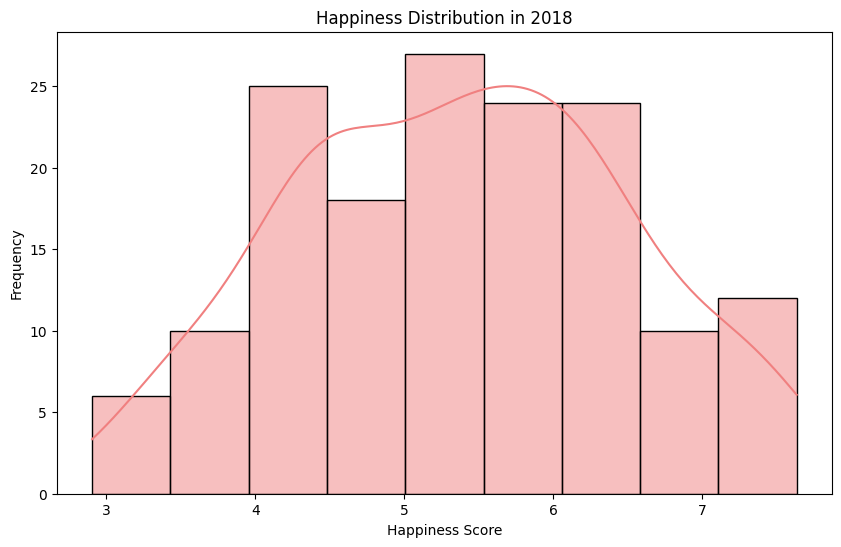

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 2018 dataset
df_2018 = pd.read_csv('../data/clean/2018_clean.csv')

# Display the first rows to inspect the data
df_2018.head()


plt.figure(figsize=(10, 6))
sns.histplot(df_2018['Happiness_Score'], kde=True, color='lightcoral')
plt.title('Happiness Distribution in 2018')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


Analysis 2: Scatter plot of 'GDP_per_Capita' vs 'Healthy_life_expectancy'
We will explore the relationship between GDP per capita and healthy life expectancy in 2018 with a scatterplot.

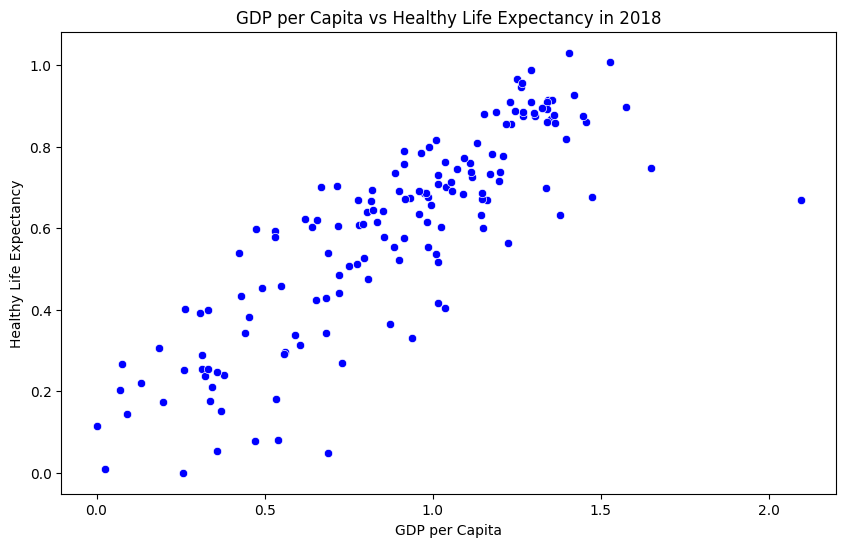

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_Capita', y='Healthy_life_expectancy', data=df_2018, color='blue')
plt.title('GDP per Capita vs Healthy Life Expectancy in 2018')
plt.xlabel('GDP per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.show()



Analysis 3: Correlation matrix between 'Happiness_Score', 'GDP_per_Capita', 'Healthy_life_expectancy', 'Freedom', 'Generosity', and 'Perceptions_of_corruption'
We will visualize the correlation matrix for key variables in 2018 to see how they relate to each other.

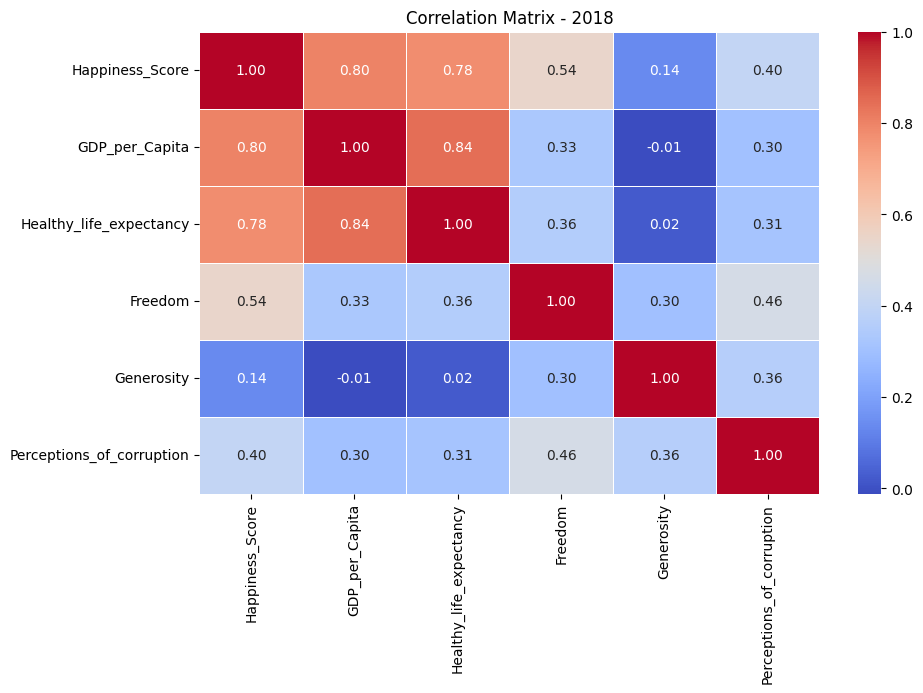

In [4]:
correlation_matrix_2018 = df_2018[['Happiness_Score', 'GDP_per_Capita', 'Healthy_life_expectancy', 'Freedom', 'Generosity', 'Perceptions_of_corruption']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2018, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - 2018')
plt.show()